# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Gabriel Richards

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [1]:
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import requests
import spacy
from textblob import TextBlob


# URL of the article
url = "https://trainmuseum.org/exhibits/the-railroad-changed-everything/"

# Send GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open a file in write mode with UTF-8 encoding
    with open('train_history_article.html', 'w', encoding='utf-8') as file:
        # Write the HTML content to the file
        file.write(response.text)
    print("Article HTML has been successfully saved to 'train_history_article.html'")
else:
    print(f"Failed to fetch the article. Status code: {response.status_code}")


Article HTML has been successfully saved to 'train_history_article.html'


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [2]:

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Read the HTML file
with open('train_history_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Create BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

# Remove common UI elements
for element in soup.find_all(['nav', 'header', 'footer', 'script', 'style', 'button', 'form']):
    element.decompose()

# Get the article text and clean it up
article_text = soup.get_text()

# Clean up the text by removing extra whitespace and newlines
cleaned_text = ' '.join(article_text.split())

# Process with spaCy
doc = nlp(cleaned_text)

# Filter out UI/navigation text and very short sentences
filtered_sentences = []
for sent in doc.sents:
    text = sent.text.strip()
    # Skip sentences that look like navigation/UI elements
    if any(skip in text.lower() for skip in [
            # Original items
            'menu', 'search', 'facebook', 'instagram',
            'privacy policy', 'accessibility', 'skip to content',
            'contact', 'donate', 'buy', 'museum', 'shop', 'blog',
            # Additional UI elements
            'ticket', 'close', 'enter to', 'esc to', 
            'back to', 'exhibit hall', 'online now',
            # Footer/contact items
            'address', 'phone', 'email',
            # Navigation items
            'visit', 'events', 'programs', 'support', 'learn',
            # Social proof/legal
            'copyright', 'permission', 'follow us'
        ]):
        continue
    # Skip very short sentences
    if len(sent) < 3:
        continue
    filtered_sentences.append(text)

# Create TextBlob object for sentiment analysis
blob = TextBlob(' '.join(filtered_sentences))

# Get polarity score
polarity = blob.sentiment.polarity

# Count sentences
sentence_count = len(filtered_sentences)

# Print results
print(f"Sentiment Polarity Score: {polarity:.2f}")
print(f"Number of sentences in the article: {sentence_count}")

Sentiment Polarity Score: 0.14
Number of sentences in the article: 76


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [3]:

nlp = spacy.load('en_core_web_sm')



# Create a list of tokens, excluding punctuation and whitespace
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]

# Count token frequencies
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common = token_freq.most_common(5)

# Print results
print("Five Most Common Tokens:")
for token, freq in most_common:
    print(f"Token: '{token}' - Frequency: {freq}")
    

Five Most Common Tokens:
Token: 'the' - Frequency: 111
Token: 'of' - Frequency: 42
Token: 'and' - Frequency: 41
Token: 'to' - Frequency: 40
Token: 'a' - Frequency: 24


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [4]:
# Create a list of lemmas, excluding punctuation and whitespace
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]

# Count lemma frequencies
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print results
print("Five Most Common Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}' - Frequency: {freq}")

Five Most Common Lemmas:
Lemma: 'the' - Frequency: 111
Lemma: 'be' - Frequency: 47
Lemma: 'of' - Frequency: 42
Lemma: 'and' - Frequency: 41
Lemma: 'to' - Frequency: 40


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

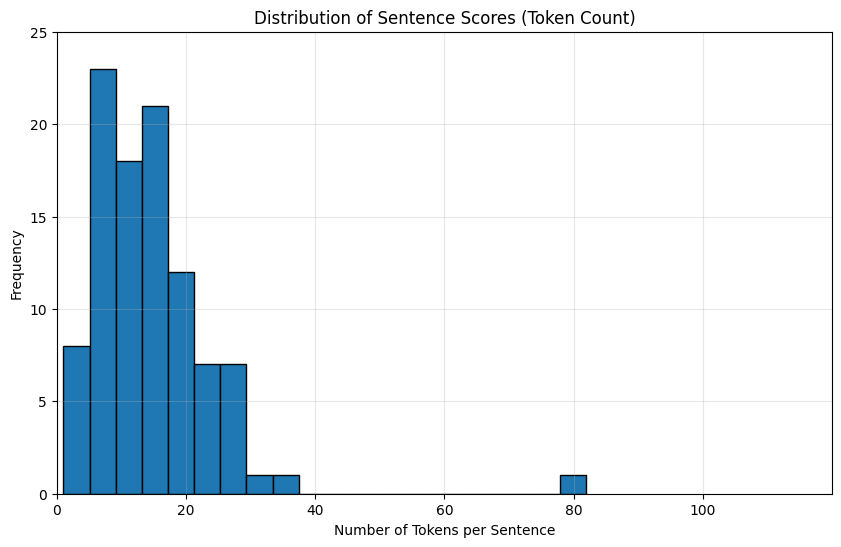

Minimum score: 1
Maximum score: 82
Average score: 14.86


In [ ]:


# Calculate sentence scores (using token counts)
sentence_scores = [len([token for token in sent if not token.is_punct and not token.is_space])
                  for sent in doc.sents]

plt.figure(figsize=(10, 6))

# Create histogram with exactly 20 bins
plt.hist(sentence_scores, bins=20, edgecolor='black')

# Set axis ticks
plt.xticks(np.arange(0, 120, 20))  # x-axis in steps of 20
plt.yticks(np.arange(0, 30, 5))    # y-axis in steps of 5

plt.title('Distribution of Sentence Scores (Token Count)')
plt.xlabel('Number of Tokens per Sentence')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Set axis limits
plt.xlim(0, 120)

plt.show()

# Print some basic statistics
print(f"Minimum score: {min(sentence_scores)}")
print(f"Maximum score: {max(sentence_scores)}")
print(f"Average score: {sum(sentence_scores)/len(sentence_scores):.2f}")

# Most common range is ~4-8

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?


Most frequent bin range: 4.3-7.7
Minimum score: 1
Maximum score: 68
Average score: 13.44


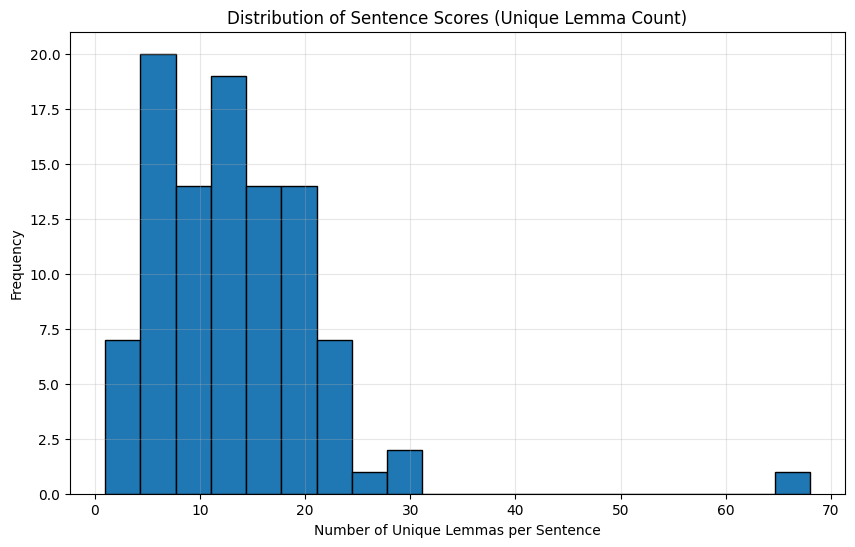

In [ ]:

# Calculate sentence scores using lemmas (ensuring we're actually using lemmas)
sentence_scores_lemmas = []
for sent in doc.sents:
    # Count unique lemmas in the sentence (excluding punctuation and spaces)
    lemmas = set(token.lemma_.lower() for token in sent 
                 if not token.is_punct and not token.is_space)
    sentence_scores_lemmas.append(len(lemmas))

# Create histogram and get the bin counts and edges
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(sentence_scores_lemmas, bins=20, edgecolor='black')

# Add titles and labels
plt.title('Distribution of Sentence Scores (Unique Lemma Count)')
plt.xlabel('Number of Unique Lemmas per Sentence')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Find the bin with highest frequency
max_count_idx = np.argmax(counts)
bin_start = bins[max_count_idx]
bin_end = bins[max_count_idx + 1]
print(f"\nMost frequent bin range: {bin_start:.1f}-{bin_end:.1f}")

# Print some basic statistics
print(f"Minimum score: {min(sentence_scores_lemmas)}")
print(f"Maximum score: {max(sentence_scores_lemmas)}")
print(f"Average score: {sum(sentence_scores_lemmas)/len(sentence_scores_lemmas):.2f}")

plt.show()

# The most common range is 4.3-7.7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 25
* Cutoff Score (lemmas): 22

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [7]:
# Initialize empty list for summary sentences 
summary_sentences = []

# Calculate scores and add sentences that exceed cutoff
for sent in doc.sents:
    # Count tokens (excluding punctuation and spaces)
    score = len([token for token in sent if not token.is_punct and not token.is_space])
   
    # If score exceeds cutoff, add sentence to summary
    if score > 25:
        summary_sentences.append(sent.text.strip())

# Join sentences with newlines and print summary
summary = '\n'.join(summary_sentences)
print(summary)

The journey west ~ 2,400 miles and 4-8 months ~ was reduced to a mere week or two following the completion of the first transcontinental railroad.
Union Pacific Railroad Museum Northern Transcontinentals “Whoever seized the existing and future routes of trade here would have control of an area embracing eight huge and barely populated states which held incalculable resources.”
Much like the Central and Union Pacifics, the NP was granted large amounts of land by the U.S. Government in return for completing the first northern transcontinental.
Native Americans had distinct advantages over the European settlers because they had adapted to the environment, had developed trade networks, and were able to thrive within their means.
Image courtesy of Snoqualmie Valley Historical Museum PO-332-3 Arrival of Railroads in the Nortwest Instead of a remote outpost that took months of travel to get to, the railroad made the region accessible.
It was by design that much of the settlement lands were la

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [8]:
# Get the summary text from the last cell
summary_text = '\n'.join(summary_sentences)

# Create TextBlob object for sentiment analysis
summary_blob = TextBlob(summary_text)

# Get polarity score and sentence count
polarity = summary_blob.sentiment.polarity
sentence_count = len(summary_sentences)

# Print results with labels
print(f"Token Summary Sentiment Polarity Score: {polarity:.2f}")
print(f"Number of sentences in the Token summary: {sentence_count}")

Token Summary Sentiment Polarity Score: 0.08
Number of sentences in the Token summary: 10


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [9]:
# Initialize empty list for summary sentences
lemma_summary_sentences = []

# Calculate scores and add sentences that exceed cutoff
for sent in doc.sents:
    # Get unique lemmas in the sentence (excluding punctuation and spaces)
    lemmas = set(token.lemma_.lower() for token in sent 
                 if not token.is_punct and not token.is_space)
    
    # Calculate lemma score
    score = len(lemmas)
    
    # If score exceeds cutoff, add sentence to summary
    if score > 22:
        lemma_summary_sentences.append(sent.text.strip())

# Join sentences with newlines and print summary
lemma_summary = '\n'.join(lemma_summary_sentences)
print(lemma_summary)

The journey west ~ 2,400 miles and 4-8 months ~ was reduced to a mere week or two following the completion of the first transcontinental railroad.
Union Pacific Railroad Museum Northern Transcontinentals “Whoever seized the existing and future routes of trade here would have control of an area embracing eight huge and barely populated states which held incalculable resources.”
Much like the Central and Union Pacifics, the NP was granted large amounts of land by the U.S. Government in return for completing the first northern transcontinental.
Native Americans had distinct advantages over the European settlers because they had adapted to the environment, had developed trade networks, and were able to thrive within their means.
Image courtesy of Snoqualmie Valley Historical Museum PO-332-3 Arrival of Railroads in the Nortwest Instead of a remote outpost that took months of travel to get to, the railroad made the region accessible.
Now, tourism wasn’t just for the rich and powerful, the le

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [10]:
# Get the summary text from the last cell
lemma_summary_text = '\n'.join(lemma_summary_sentences)

# Create TextBlob object for sentiment analysis
lemma_summary_blob = TextBlob(lemma_summary_text)

# Get polarity score and sentence count
lemma_polarity = lemma_summary_blob.sentiment.polarity
lemma_sentence_count = len(lemma_summary_sentences)

# Print results with labels
print(f"Lemma-Based Summary Sentiment Polarity Score: {lemma_polarity:.2f}")
print(f"Number of sentences in the lemma-based summary: {lemma_sentence_count}")


Lemma-Based Summary Sentiment Polarity Score: 0.11
Number of sentences in the lemma-based summary: 9


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?  Answer in this Markdown cell.  

Polarity Score Comparison:
Comparing the scores (Original: 0.14, Token: ~0.08, Lemma: ~0.11), there is a slight difference, with both summaries being less positive than the original article. 
This likely occurred because our selection methods favored longer sentences containing factual, historical information rather than shorter evaluative statements that often carry stronger sentiment. 
Since we selected sentences based complexity/uniqueness rather than emotional content, some of the more sentiment-rich passages were likely excluded from the summaries.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

The lemma-based summary is better. While both contain extraneous content (e.g. contact information), the lemma summary provides a more balanced view of the railroad's impact. 

The token summary includes similar core content but lacks some key social elements and includes redundant information about land grants. Both summaries would benefit from filtering the museum contact information, but the lemma-based version tells a more complete and balanced story of how railroads transformed American society.
